<a href="https://colab.research.google.com/github/lima2403/Analise-de-Dados-Turbina-E-lica/blob/main/Analise_de_Dados_Turbina_E%C3%B3lica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de Dados de uma Usina Eólica

**Sobre o conjunto de dados
Contexto**

---


Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc., em intervalos de 10 minutos. Este arquivo foi retirado do sistema scada de uma turbina eólica que está funcionando e gerando energia na Turquia.


Bibliotecas:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Bases de Dados:

In [6]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'ActivePower (kW)', 'Wind Speed (m/s)', 'CurvaTeorica(KWh)', 'DireçaoVento(°)']
del turbina ['DireçaoVento(°)']
turbina ['Data/Hora'] = pd.to_datetime(turbina ['Data/Hora'])
display(turbina)

,Data/Hora,ActivePower (kW),Wind Speed (m/s),CurvaTeorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


Grafico de rendimento real da turbina

<Axes: xlabel='Wind Speed (m/s)', ylabel='ActivePower (kW)'>

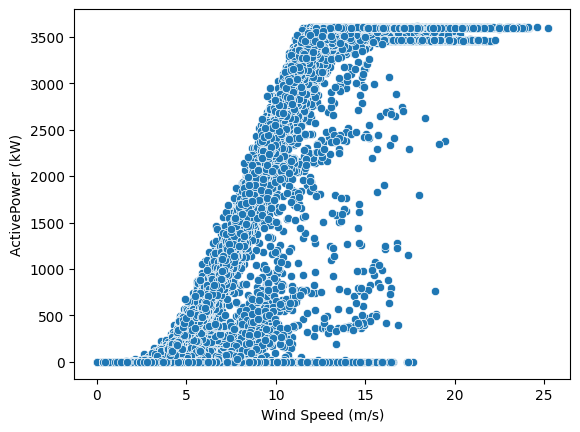

In [7]:
sns.scatterplot(data=turbina, x= 'Wind Speed (m/s)', y='ActivePower (kW)' )

Grafico de Melhor rendimento possivel

<Axes: xlabel='Wind Speed (m/s)', ylabel='CurvaTeorica(KWh)'>

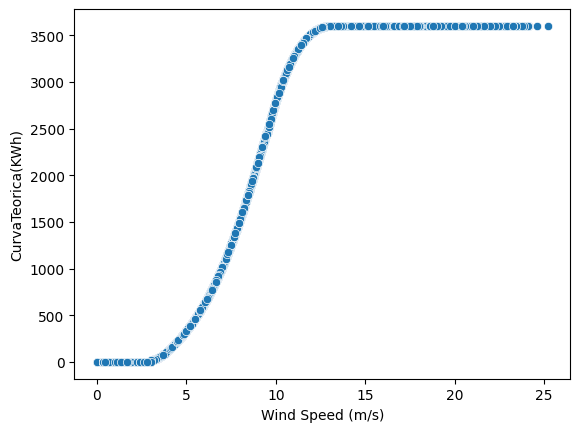

In [8]:
sns.scatterplot(data=turbina, x= 'Wind Speed (m/s)', y='CurvaTeorica(KWh)' )

In [11]:
pot_real= turbina['ActivePower (kW)'].tolist()
pot_teorica= turbina['CurvaTeorica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
      dentro_limite.append('Dentro')
    elif potencia == 0:
      dentro_limite.append('Zero')
    else:
      dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


In [12]:
turbina['DentroLimite'] = dentro_limite

<Axes: xlabel='Wind Speed (m/s)', ylabel='ActivePower (kW)'>

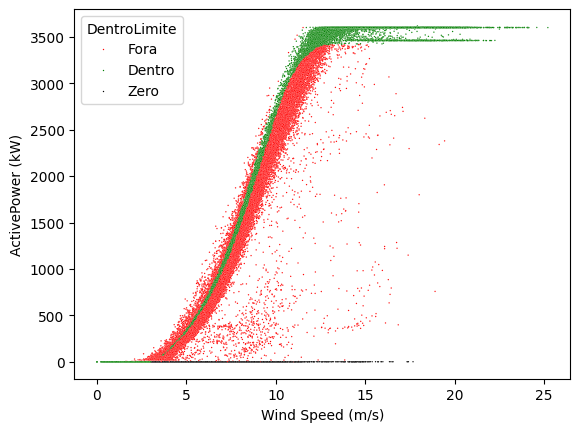

In [18]:
cores={'Dentro': 'green', 'Fora': 'Red', 'Zero':'black'}
sns.scatterplot(data=turbina, x= 'Wind Speed (m/s)', y='ActivePower (kW)', hue= 'DentroLimite', s=1, palette=cores )

O gráfico mostra que a turbina eólica está funcionando de forma consistente, com uma taxa de tempo ativo de cerca de 90%. No entanto, há algumas anomalias no gráfico que merecem atenção.

Observações específicas

Há uma faixa de valores de velocidade do vento entre 15 e 20 m/s onde o tempo ativo é significativamente menor do que em outras faixas de velocidade do vento. Isso pode ser devido a uma combinação de fatores, incluindo turbulência do ar, problemas mecânicos com a turbina, ou mudanças na direção do vento.
Há também uma faixa de valores de velocidade do vento entre 0 e 5 m/s onde o tempo ativo é maior do que o esperado. Isso pode ser devido a um problema com o sensor de velocidade do vento, ou pode ser devido a uma mudança no design da turbina que permite que ela gere energia em velocidades de vento mais baixas.